In [7]:
import sys
!{sys.executable} -m pip install scikit-learn




   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 1.7 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/11.2 MB 1.5 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.2 MB 1.4 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.2 MB 1.4 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.2 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.2 MB 1.1 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.2 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.2 MB 1.1 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.2 MB 1.0 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.2 MB 1.0 MB/s eta 0:00:09
   --------- -------

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the stock data
file_path = r'C:\Users\yevag\Downloads\AAPL_short_volume.csv'
data = pd.read_csv(file_path)
data = data.dropna()
close_prices_AAPL = data['Close']

# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)









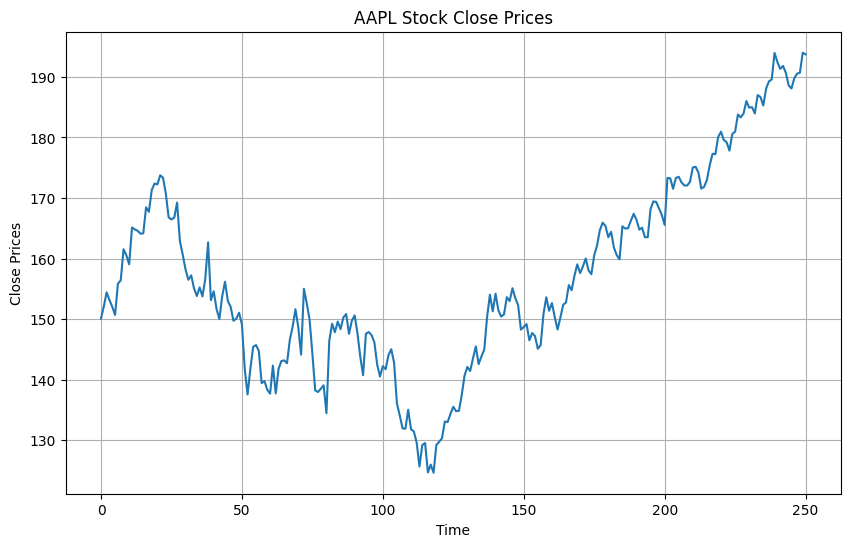

In [16]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('AAPL Stock Close Prices')
plt.grid(True)
plt.show()


In [17]:
# Data preprocessing
data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [18]:
# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021A76C63D30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
NaNs in test_data[1:]: 0
NaNs in test_predictions: 0
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


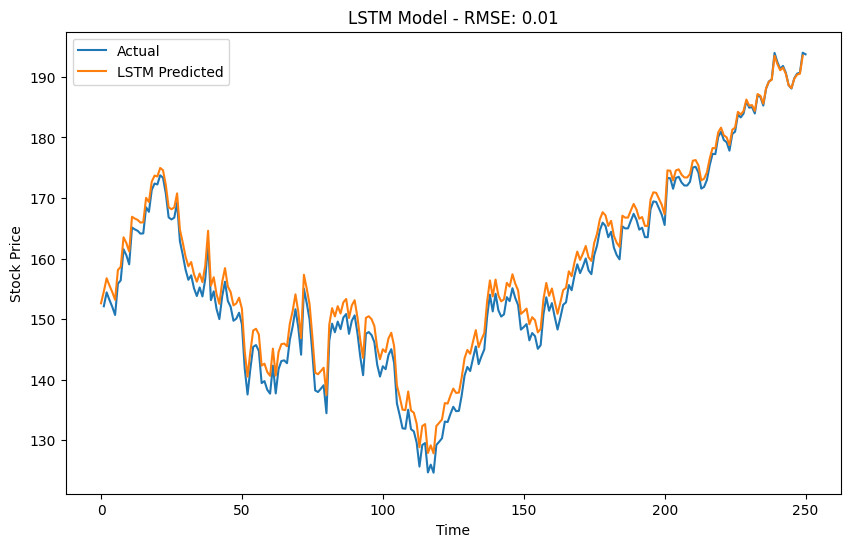

In [19]:
# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()
            print("NaNs in test_data[1:]:", np.isnan(test_data[1:]).sum())
            print("NaNs in test_predictions:", np.isnan(test_predictions).sum())


            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)

# Plotting LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse[1:], label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate the scaling factor based on the maximum value of the original data
scaling_factor = np.max(close_prices_AAPL_reverse)

# Function to predict future stock prices using the LSTM model
def predict_future_lstm(model, data, num_predictions, scaling_factor):
    predictions = []
    last_data_point = data[-1]

    for _ in range(num_predictions):
        prediction = model.predict(last_data_point.reshape(1, 1, 1), verbose=0)
        predictions.append(prediction[0, 0])
        last_data_point = np.array([[prediction[0, 0]]])

    predictions = np.array(predictions) * scaling_factor
    return predictions

# Predict the next 10 days using the LSTM model
num_predictions = 10
lstm_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)


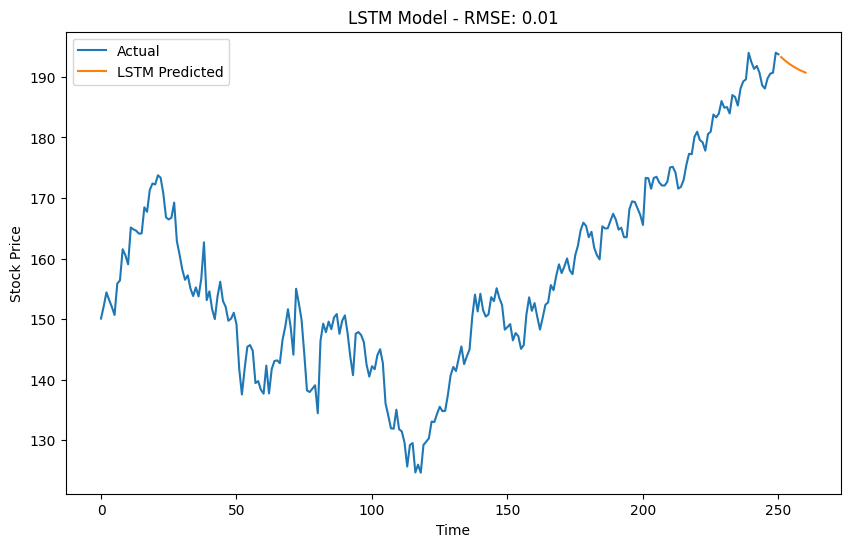

Predicted stock prices for the next 10 days:
Day 1: 193.27
Day 2: 192.86
Day 3: 192.49
Day 4: 192.15
Day 5: 191.85
Day 6: 191.57
Day 7: 191.32
Day 8: 191.10
Day 9: 190.89
Day 10: 190.71


In [20]:
# Plot the LSTM predictions for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse, label='Actual')
plt.plot(np.arange(len(close_prices_AAPL_reverse), len(close_prices_AAPL_reverse) + num_predictions), lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted stock prices for the next 10 days using LSTM
print("Predicted stock prices for the next 10 days:")
for i, prediction in enumerate(lstm_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")

In [21]:
# Initial model before tuning
initial_model = create_lstm_model(units=50, activation='tanh', learning_rate=0.001)
initial_model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=100, batch_size=32, verbose=0)

# Predictions and RMSE
initial_preds = initial_model.predict(test_data[:-1].reshape(-1, 1, 1))
initial_rmse = np.sqrt(mean_squared_error(test_data[1:], initial_preds))

print(f"Initial RMSE: {initial_rmse:.4f}")


C:\Users\yevag\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Initial RMSE: 0.0793
